In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
url='https://raw.githubusercontent.com/niranjanmeegammana/ML-course/main/projects/fruit%20data.csv'
df=pd.read_csv(url)
df.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Exploratory Data Analysis (EDA)
checking data imbalance

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [11]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

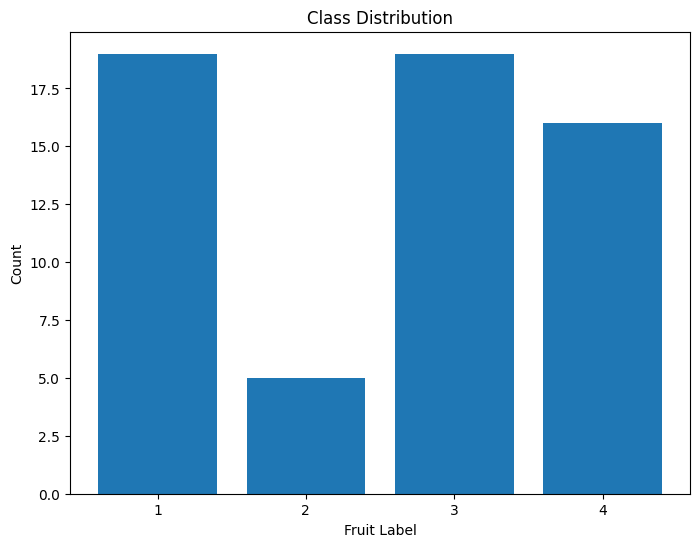

In [13]:
# Check the class distribution
class_distribution = df['fruit_label'].value_counts()

# Visualize the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Fruit Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_distribution.index)
plt.show()

## Correlation Analysis
help visualize correlations between numerical features using heatmaps or scatter plots.

<ipython-input-14-d2be75a801b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


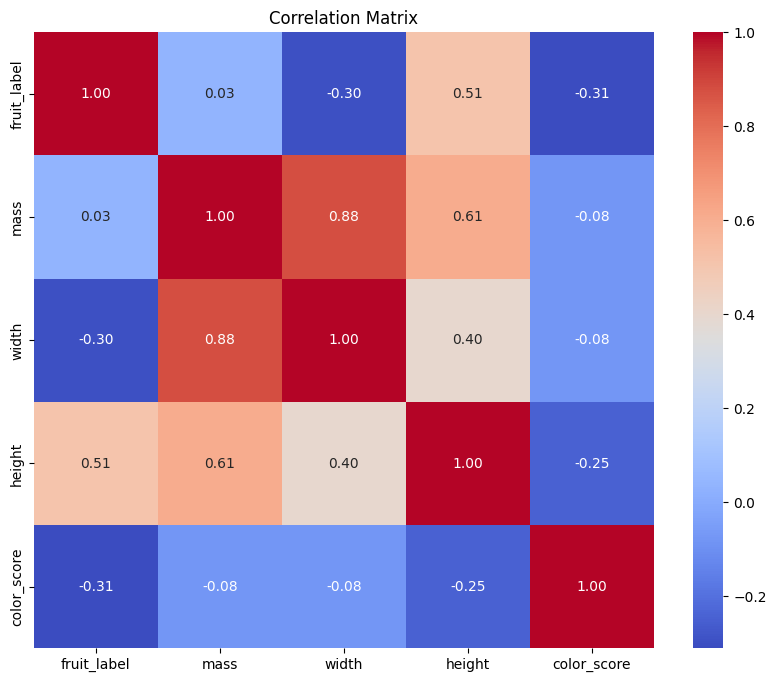

In [14]:
import seaborn as sns
# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## scatter plot
this is a great way to visualize the relationship between two numerical variables. create a scatter plot between the 'mass' and 'width' features.

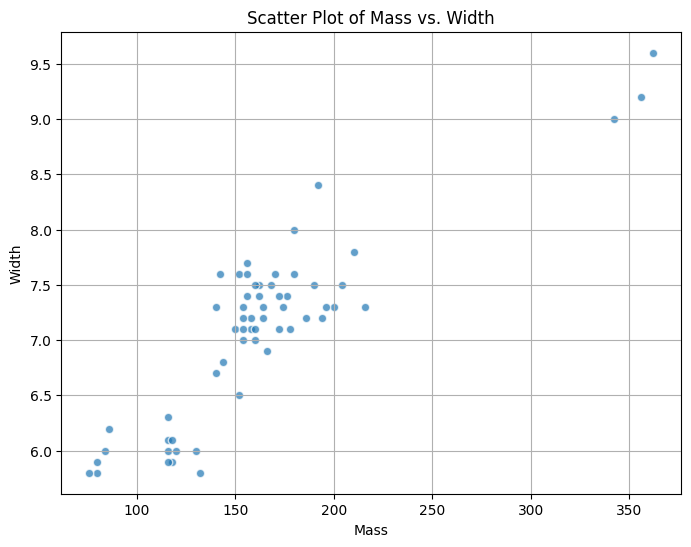

In [15]:
#Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['mass'], df['width'], alpha=0.7, edgecolors='w')
plt.xlabel('Mass')
plt.ylabel('Width')
plt.title('Scatter Plot of Mass vs. Width')
plt.grid(True)
plt.show()

## Pair Plots
# help visualize the relationships between multiple numerical features simultaneously, helping identify patterns or clusters

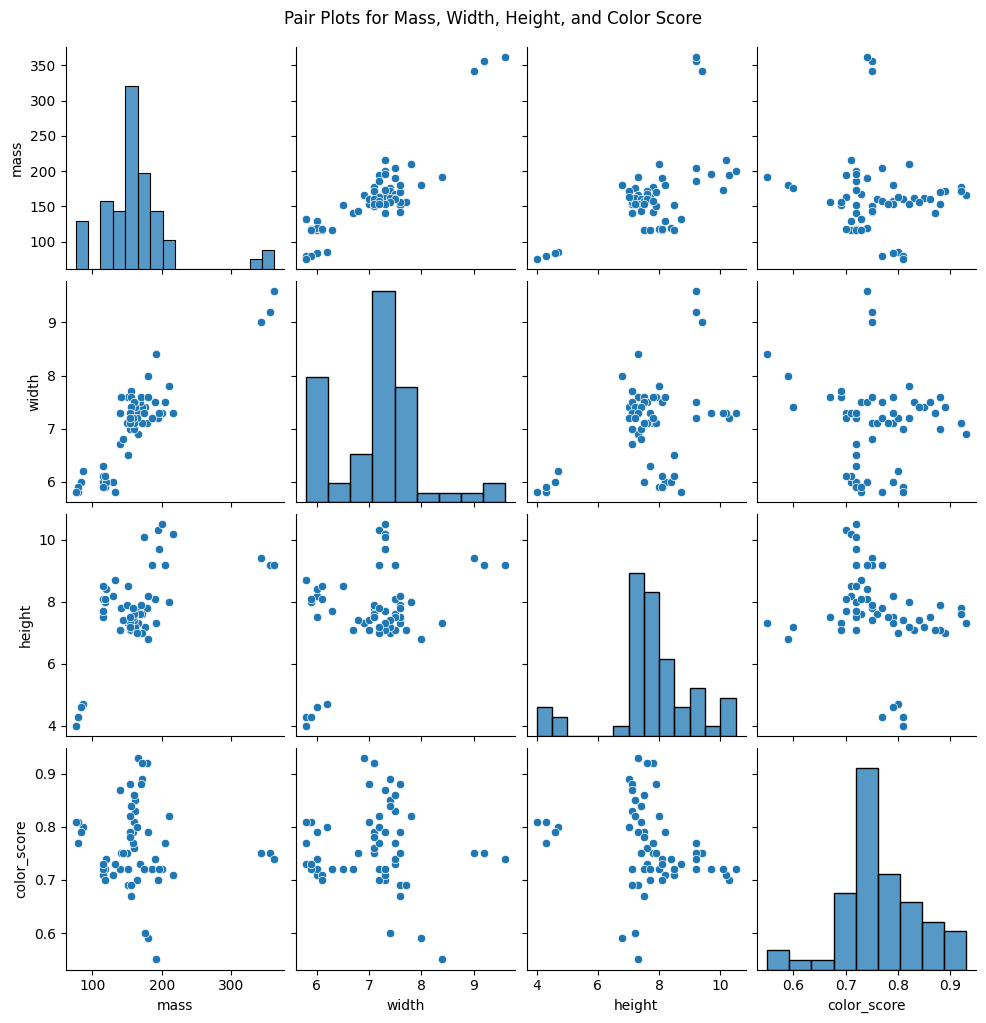

In [16]:
#Create the pair plot
sns.pairplot(df[['mass', 'width', 'height', 'color_score']])
plt.suptitle('Pair Plots for Mass, Width, Height, and Color Score', y=1.02)
plt.show()

## Categorical Data Analysis  
creating bar plots or pie charts to understand the distribution of each category

Frequency table for 'fruit_name':
apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64


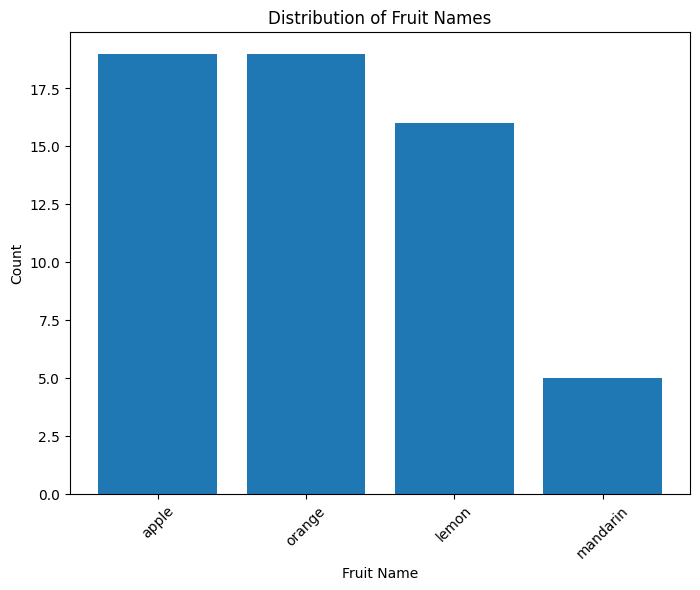

fruit_subtype,braeburn,cripps_pink,golden_delicious,granny_smith,mandarin,selected_seconds,spanish_belsan,spanish_jumbo,turkey_navel,unknown
fruit_name,,,,,,,,,,
apple,5,6,5,3,0,0,0,0,0,0
lemon,0,0,0,0,0,0,6,0,0,10
mandarin,0,0,0,0,5,0,0,0,0,0
orange,0,0,0,0,0,6,0,3,10,0


In [19]:
#Frequency Tables
# Calculate the frequency of each category in the 'fruit_name' column
fruit_name_counts = df['fruit_name'].value_counts()

# Display the frequency table
print("Frequency table for 'fruit_name':")
print(fruit_name_counts)

# Bar Plot
# Create a bar plot to visualize the distribution of 'fruit_name'
plt.figure(figsize=(8, 6))
plt.bar(fruit_name_counts.index, fruit_name_counts.values)
plt.xlabel('Fruit Name')
plt.ylabel('Count')
plt.title('Distribution of Fruit Names')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulation
# Create a cross-tabulation between 'fruit_name' and 'fruit_subtype'
cross_tab = pd.crosstab(df['fruit_name'], df['fruit_subtype'])
cross_tab

## Data Cleaning
check null values

In [7]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

drop or impute missing values and remove duplicate rows

In [24]:
#drop missing values
# df.dropna(inplace=True)

# impute missing values using the mean, you can use:
# df.fillna(df.mean(), inplace=True)

# Check for duplicate rows in the DataFrame
print(df.duplicated().sum())

# remove duplicate rows:
# df.drop_duplicates(inplace=True)


0


## Outlier Detection
 help detect and handle outliers that might affect your analysis or models.

z-score method

In [21]:
from scipy import stats

# Calculate the Z-scores for each numerical feature
z_scores = stats.zscore(df[['mass', 'width', 'height', 'color_score']])

# Define a threshold for outlier detection (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1) | (z_scores < -threshold).any(axis=1)

# Filter out the outliers
df_no_outliers = df[~outlier_indices]
df_no_outliers

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


## Interquartile Range (IQR) Method:
Calculating the range between the first quartile (Q1) and the third quartile (Q3) of the data. Data points beyond a certain range from Q1 and Q3 are considered outliers.

In [25]:
#Calculate the first quartile (Q1) and third quartile (Q3)
# for each numerical feature
Q1 = df[['mass', 'width', 'height', 'color_score']].quantile(0.25)
Q3 = df[['mass', 'width', 'height', 'color_score']].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a threshold for outlier detection
#(e.g., Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)

threshold = 1.5

# Find the indices of outliers
outlier_indices = ((df[['mass', 'width', 'height', 'color_score']] < Q1 - threshold * IQR) | (df[['mass', 'width', 'height', 'color_score']] > Q3 + threshold * IQR)).any(axis=1)

# Filter out the outliers
df_no_outliers = df[~outlier_indices]
df_no_outliers


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89
10,1,apple,braeburn,166,6.9,7.3,0.93
11,1,apple,braeburn,172,7.1,7.6,0.92
12,1,apple,braeburn,154,7.0,7.1,0.88
13,1,apple,golden_delicious,164,7.3,7.7,0.70
14,1,apple,golden_delicious,152,7.6,7.3,0.69
15,1,apple,golden_delicious,156,7.7,7.1,0.69


## Data transformation
Here we modify the data to improve its quality, distribution, and suitability for analysis or modeling.

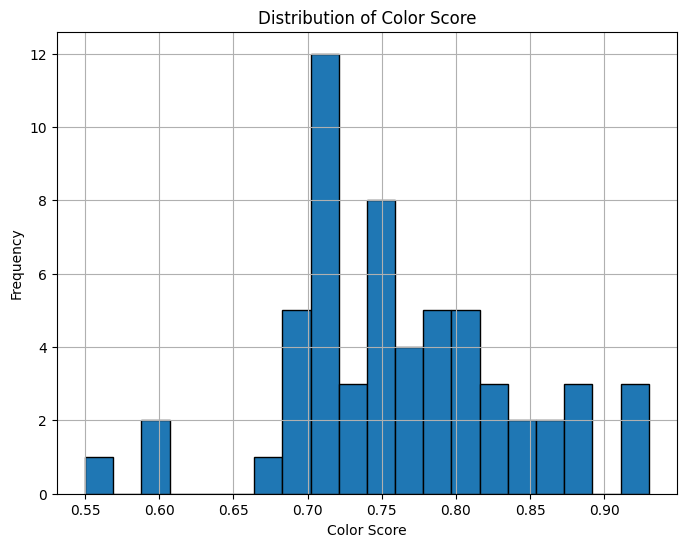

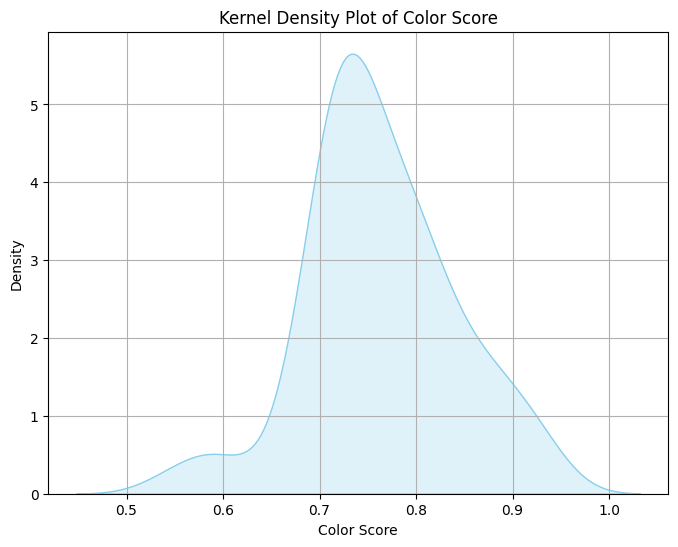

In [31]:
#Color_score distribution

#Create the histogram for 'color_score'
plt.figure(figsize=(8, 6))
plt.hist(df['color_score'], bins=20, edgecolor='black')
plt.xlabel('Color Score')
plt.ylabel('Frequency')
plt.title('Distribution of Color Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['color_score'], fill=True, color='skyblue')
plt.xlabel('Color Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Color Score')
plt.grid(True)
plt.show()


### log transformation
Log Transformation is done when data has a skewed distribution. It
helps stabilize variance and reduce the impact of outliers.

## Square Root Transformation:
Use when data has a right-skewed distribution.
Helps reduce the effect of outliers and stabilize variance.

In [29]:
# Log-transform a column 'column_name'
df['log_transformed_column'] = np.log(df['color_score'])
df['log_transformed_column']

0    -0.597837
1    -0.527633
2    -0.510826
3    -0.223144
4    -0.235722
5    -0.261365
6    -0.210721
7    -0.210721
8    -0.083382
9    -0.116534
10   -0.072571
11   -0.083382
12   -0.127833
13   -0.356675
14   -0.371064
15   -0.371064
16   -0.400478
17   -0.314711
18   -0.186330
19   -0.162519
20   -0.150823
21   -0.174353
22   -0.139262
23   -0.127833
24   -0.287682
25   -0.287682
26   -0.301105
27   -0.261365
28   -0.328504
29   -0.210721
30   -0.235722
31   -0.198451
32   -0.223144
33   -0.301105
34   -0.287682
35   -0.287682
36   -0.274437
37   -0.235722
38   -0.261365
39   -0.287682
40   -0.248461
41   -0.235722
42   -0.198451
43   -0.356675
44   -0.328504
45   -0.328504
46   -0.342490
47   -0.328504
48   -0.328504
49   -0.314711
50   -0.342490
51   -0.328504
52   -0.328504
53   -0.301105
54   -0.342490
55   -0.328504
56   -0.314711
57   -0.328504
58   -0.356675
Name: log_transformed_column, dtype: float64

## Min-Max Scaling:
Scale numerical features to a specific range (e.g., [0, 1]) to ensure all features have equal importance in certain models like K-means or neural networks.

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Create a copy of the DataFrame for scaling
df_sc = df.copy()
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
# Scale the numerical features in the DataFrame 'df_sc'
df_sc[['mass', 'width', 'height', 'color_score']] = scaler.fit_transform(df[['mass', 'width', 'height', 'color_score']])
# Display the first five rows of the scaled DataFrame
print(df_sc.head())



   fruit_label fruit_name fruit_subtype      mass     width    height  \
0            1      apple  granny_smith  0.405594  0.684211  0.507692   
1            1      apple  granny_smith  0.363636  0.578947  0.430769   
2            1      apple  granny_smith  0.349650  0.421053  0.492308   
3            2   mandarin      mandarin  0.034965  0.105263  0.107692   
4            2   mandarin      mandarin  0.027972  0.052632  0.092308   

   color_score  log_transformed_column  
0     0.000000               -0.597837  
1     0.105263               -0.527633  
2     0.131579               -0.510826  
3     0.657895               -0.223144  
4     0.631579               -0.235722  


## Standardization (Z-score normalization):
Scale numerical features to have zero mean and unit variance.

In [35]:
from sklearn.preprocessing import StandardScaler

df_sc = df.copy()
scaler = StandardScaler()
df_sc[['mass', 'width', 'height', 'color_score']] = scaler.fit_transform(df[['mass', 'width', 'height', 'color_score']])
# Display the first five rows of the scaled DataFrame
print(df_sc.head())

   fruit_label fruit_name fruit_subtype      mass     width    height  \
0            1      apple  granny_smith  0.529442  1.598690 -0.291397   
1            1      apple  granny_smith  0.309462  1.104854 -0.661922   
2            1      apple  granny_smith  0.236136  0.364100 -0.365502   
3            2   mandarin      mandarin -1.413709 -1.117409 -2.218131   
4            2   mandarin      mandarin -1.450372 -1.364327 -2.292236   

   color_score  log_transformed_column  
0    -2.793595               -0.597837  
1    -2.268684               -0.527633  
2    -2.137456               -0.510826  
3     0.487100               -0.223144  
4     0.355872               -0.235722  


## Binning:
Convert continuous data into discrete categories (bins) to simplify analysis or reduce the impact of outliers.

In [49]:
# Define the bin edges
bin_edges = [40, 80, 150, float('inf')]  # Change the bin edges as needed


# Define the bin labels (optional)
bin_labels = ['Low Mass', 'Medium Mass', 'High Mass']

# Perform binning using the 'cut()' function
df['mass_bins'] = pd.cut(df['mass'], bins=bin_edges, labels=bin_labels, right=False)

# Step 4: View the DataFrame with the new 'mass_bins' column
print(df[['mass', 'mass_bins']].head(15))
print(df['mass_bins'].value_counts())

    mass    mass_bins
0    192    High Mass
1    180    High Mass
2    176    High Mass
3     86  Medium Mass
4     84  Medium Mass
5     80  Medium Mass
6     80  Medium Mass
7     76     Low Mass
8    178    High Mass
9    172    High Mass
10   166    High Mass
11   172    High Mass
12   154    High Mass
13   164    High Mass
14   152    High Mass
High Mass      41
Medium Mass    17
Low Mass        1
Name: mass_bins, dtype: int64


#Data Modelling

In [50]:
df=pd.read_csv(url)
df.head()



,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Convert categorical nominal features (fruit_subtype, fruit_name) into numerical representations using techniques like one-hot encoding or label encoding.

One-Hot Encoding:
One-hot encoding creates binary columns for each category in the categorical variable. Each binary column represents the presence or absence of a category in the original feature.

In [51]:
# Perform one-hot encoding on 'fruit_subtype' and 'fruit_name'
df_encoded = pd.get_dummies(df, columns=['fruit_subtype', 'fruit_name'])
df_encoded

,fruit_label,mass,width,height,color_score,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange
0,1,192,8.4,7.3,0.55,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,180,8.0,6.8,0.59,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,176,7.4,7.2,0.60,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,2,86,6.2,4.7,0.80,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2,84,6.0,4.6,0.79,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,2,80,5.8,4.3,0.77,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,2,80,5.9,4.3,0.81,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,2,76,5.8,4.0,0.81,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,1,178,7.1,7.8,0.92,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9,1,172,7.4,7.0,0.89,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Label Encoding:
Label encoding assigns a unique integer to each category in the categorical variable.

In [55]:
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Perform label encoding on 'fruit_subtype' and 'fruit_name'
df['fruit_subtype_encoded'] = label_encoder.fit_transform(df['fruit_subtype'])
df['fruit_name_encoded'] = label_encoder.fit_transform(df['fruit_name'])
encoded_columns = df[['fruit_name_encoded', 'fruit_subtype_encoded']]
print(encoded_columns)

    fruit_name_encoded  fruit_subtype_encoded
0                    0                      3
1                    0                      3
2                    0                      3
3                    2                      4
4                    2                      4
5                    2                      4
6                    2                      4
7                    2                      4
8                    0                      0
9                    0                      0
10                   0                      0
11                   0                      0
12                   0                      0
13                   0                      2
14                   0                      2
15                   0                      2
16                   0                      2
17                   0                      2
18                   0                      1
19                   0                      1
20                   0            

since there is no inherent order er in categorical columns we will use one hot enciding

In [57]:
df=df_encoded
df

,fruit_label,mass,width,height,color_score,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange
0,1,192,8.4,7.3,0.55,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,180,8.0,6.8,0.59,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,176,7.4,7.2,0.60,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,2,86,6.2,4.7,0.80,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2,84,6.0,4.6,0.79,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,2,80,5.8,4.3,0.77,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,2,80,5.9,4.3,0.81,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,2,76,5.8,4.0,0.81,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,1,178,7.1,7.8,0.92,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9,1,172,7.4,7.0,0.89,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Perform Min-Max scaling on numerical features

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features
numerical_features = ['mass', 'width', 'height', 'color_score']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled DataFrame
print(df.head())


   fruit_label      mass     width    height  color_score  \
0            1  0.405594  0.684211  0.507692     0.000000   
1            1  0.363636  0.578947  0.430769     0.105263   
2            1  0.349650  0.421053  0.492308     0.131579   
3            2  0.034965  0.105263  0.107692     0.657895   
4            2  0.027972  0.052632  0.092308     0.631579   

   fruit_subtype_braeburn  fruit_subtype_cripps_pink  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   fruit_subtype_golden_delicious  fruit_subtype_granny_smith  \
0                               0                           1   
1                               0                           1   
2                               0                           1   
3                               0   

## Feature Selection:
Identify relevant features for fruit recognition and remove any irrelevant or redundant ones.

Random forest feature selection

In [62]:
from os import RWF_APPEND
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = df.drop(['fruit_label'], axis=1)  # Features
y = df['fruit_label']  # Target variable

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Fit the model on the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N most important features (you can choose a threshold or a fixed number of features)
N = 5
selected_features = feature_importance_df.head(N)['Feature'].tolist()

# Filter the DataFrame to keep only the selected features
RF_selected_df = df[selected_features + ['fruit_label']]

# Display the first few rows of the DataFrame with selected features
print(RF_selected_df.head(20))


    fruit_name_apple  fruit_name_orange  fruit_name_lemon  color_score  \
0                  1                  0                 0     0.000000   
1                  1                  0                 0     0.105263   
2                  1                  0                 0     0.131579   
3                  0                  0                 0     0.657895   
4                  0                  0                 0     0.631579   
5                  0                  0                 0     0.578947   
6                  0                  0                 0     0.684211   
7                  0                  0                 0     0.684211   
8                  1                  0                 0     0.973684   
9                  1                  0                 0     0.894737   
10                 1                  0                 0     1.000000   
11                 1                  0                 0     0.973684   
12                 1                  

In [64]:

# Calculate the correlation matrix between features and the target variable
correlation_matrix = df.corr()

# Identify the correlation values with the target variable ('fruit_label')
correlation_with_target = correlation_matrix['fruit_label'].abs()

# Sort the features by their correlation with the target variable in descending order
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Select the top N most correlated features (you can choose a threshold or a fixed number of features)
N = 5
selected_features = sorted_correlation.head(N).index.tolist()

# Filter the DataFrame to keep only the selected features
CR_selected_df = df[selected_features + ['fruit_label']]

# Display the first few rows of the DataFrame with selected features
print(CR_selected_df.head())



   fruit_label  fruit_name_apple  fruit_name_lemon  fruit_subtype_unknown  \
0            1                 1                 0                      0   
1            1                 1                 0                      0   
2            1                 1                 0                      0   
3            2                 0                 0                      0   
4            2                 0                 0                      0   

     height  fruit_label  
0  0.507692            1  
1  0.430769            1  
2  0.492308            1  
3  0.107692            2  
4  0.092308            2  


##Train-Test Split:
Split the data into training and testing sets to evaluate the model's performance.

In [65]:
from sklearn.model_selection import train_test_split

# Select the features (X) and the target (y)
X = df_encoded.drop('fruit_label', axis=1)  # Features (all columns except 'fruit_label')
y = df_encoded['fruit_label']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 47
Testing set size: 12


## Train with Random Forest model
keep its performance data for comparison

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Store performance data in an array for comparison
performance_data = [('Random Forest', accuracy, precision, recall, f1)]

# Display the performance metrics
print("Random Forest Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Random Forest Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Train model using SVM algorithm and add performance data in an array to compare[link text](https://) with other algorithms

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Store performance data in the array for comparison
performance_data.append(('SVM', accuracy, precision, recall, f1))

# Display the performance metrics
print("SVM Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

SVM Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Hyperparameter Tuning:
#Fine-tune the model's hyperparameters to improve its performance.

In [69]:
#Perform hyperparameter tuning using Grid Search with Random Forest:


from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the Grid Search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training set
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate the accuracy of the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Model Accuracy: 1.0


In [70]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [72]:
#Create model with best hyperparameters
import joblib

#best_params = {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Create the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the entire dataset
best_rf_model.fit(X, y)

# Save the trained model to a file
model_filename = 'best_rf_model.joblib'
joblib.dump(best_rf_model, model_filename)

['best_rf_model.joblib']

inference with same data set

In [77]:
import pandas as pd
import joblib

# Load the saved Random Forest model from the file
model_filename = 'best_rf_model.joblib'
loaded_model = joblib.load(model_filename)

# Load the original fruits dataset
df = pd.read_csv(url)

# Perform one-hot encoding to transform categorical features
df_encoded = pd.get_dummies(df, columns=['fruit_subtype', 'fruit_name'])

# Loop through each record in the dataset
for index, record in df_encoded.iterrows():
    # Extract features from the record
    features = record.drop('fruit_label')  # Exclude the target variable 'fruit_label'

    # Create a DataFrame with the record's features for inferencing
    new_data = pd.DataFrame([features])

    # Perform inference using the loaded model
    predicted_fruit_label = loaded_model.predict(new_data)

    # Print the result (actual or predicted value) for the current record
    actual_fruit_label = record['fruit_label']
    print(f"Record {index+1} - Actual Fruit Label: {actual_fruit_label}, Predicted Fruit Label: {predicted_fruit_label[0]}")


Record 1 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 2 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 3 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 4 - Actual Fruit Label: 2.0, Predicted Fruit Label: 2
Record 5 - Actual Fruit Label: 2.0, Predicted Fruit Label: 2
Record 6 - Actual Fruit Label: 2.0, Predicted Fruit Label: 2
Record 7 - Actual Fruit Label: 2.0, Predicted Fruit Label: 2
Record 8 - Actual Fruit Label: 2.0, Predicted Fruit Label: 2
Record 9 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 10 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 11 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 12 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 13 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 14 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 15 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 16 - Actual Fruit Label: 1.0, Predicted Fruit Label: 1
Record 17 - Actua

In [86]:
import pandas as pd
import joblib

# Load the saved Random Forest model from the file
model_filename = 'best_rf_model.joblib'
loaded_model = joblib.load(model_filename)

# Load the original fruits dataset
df = pd.read_csv(url)

# Drop 'fruit_label' column and apply one-hot encoding
df_encoded = pd.get_dummies(df.drop('fruit_label', axis=1), columns=['fruit_subtype', 'fruit_name'])

# Create a new DataFrame with the same structure and all features set to zero
new_data = pd.DataFrame(data=[[0]*len(df_encoded.columns)], columns=df_encoded.columns)

# Given record with updated values (replace '...' with actual values)
given_record = {
      'mass': 120,
    'width': 8.4,
    'height': 4.3,
    'color_score': 0.55,
    'fruit_subtype': 'granny_smith',
    'fruit_name': 'apple'
}

# Update the new_data DataFrame with the given record values
new_data.update(pd.DataFrame(data=[given_record]))

# Perform inference using the loaded model
predicted_fruit_label = loaded_model.predict(new_data)

# Print the predicted fruit label for the given record
print("Predicted Fruit Label:", predicted_fruit_label[0])


Predicted Fruit Label: 4
